In [12]:
import pathlib
import pandas as pd
import pydicom as dcm
import pickle as pkl
from tqdm.notebook import tqdm

dream_pilot_folder = pathlib.Path('/media/HD/mamo/dream_pilot')
dream_pilot_images = list(dream_pilot_folder.glob('**/*.dcm'))
print("Number of images in pilot dataset: ", len(dream_pilot_images))



Number of images in pilot dataset:  500


In [39]:

dicom_image = dcm.dcmread(dream_pilot_images[0])

print(dream_pilot_images[0])    
sop_instance_uid = dicom_image.SOPInstanceUID
patient_id = dicom_image.PatientID
seriesInstance =  dicom_image.SeriesInstanceUID
studyInstance = dicom_image.StudyInstanceUID

print("SOP Instance UID:", sop_instance_uid)
print("Patient ID:", patient_id)
print("Series Instance UID:", seriesInstance)
print("Study Instance UID:", studyInstance)



/media/HD/mamo/dream_pilot/511240.dcm
SOP Instance UID: 1.2.840.113654.2.70.1.325931130151198351136919855088671147132
Patient ID: 20827
Series Instance UID: 1.2.840.113654.2.70.1.133325114301017420809879065533941447192
Study Instance UID: 1.2.840.113654.2.70.1.491350542012166215981011328832797802


In [37]:

print(dicom_image)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital Mammography X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.113654.2.70.1.325931130151198351136919855088671147132
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008, 0016) SOP Class UID                       UI: Digital Mammography X-Ray Image Storage - For Presentation
(0008, 0018) SOP Instance UID                    UI: 1.2.840.113654.2.70.1.

In [41]:
#create maps between dicom image names and sop_instance_uid 

filename2sop = {}
sop2filename = {}
seriesInstance2filename = {}
studyInstance2filename = {}


for image in tqdm(dream_pilot_images):
    dicom_image = dcm.dcmread(image)
    sop_instance_uid = dicom_image.SOPInstanceUID
    studyInstance_uid = dicom_image.StudyInstanceUID
    seriesInstance_uid = dicom_image.SeriesInstanceUID
    
    filename2sop[image.name] = sop_instance_uid
    
    if sop_instance_uid in sop2filename:
        print(f"Warning: SOPInstanceUID {sop_instance_uid} already exists for {sop2filename[sop_instance_uid]}. Overwriting with {image.name}.")
    else:
        sop2filename[sop_instance_uid] = image.stem
        
    # if studyInstance_uid in studyInstance2filename:
    #     print(f"Warning: StudyInstanceUID {studyInstance_uid} already exists for {studyInstance2filename[studyInstance_uid]}. Overwriting with {image.name}.")
    # else:
    #     studyInstance2filename[studyInstance_uid] = image.stem
    
    if seriesInstance_uid in seriesInstance2filename:
        print(f"Warning: SeriesInstanceUID {seriesInstance_uid} already exists for {seriesInstance2filename[seriesInstance_uid]}. Overwriting with {image.name}.")
    else:
        seriesInstance2filename[seriesInstance_uid] = image.stem



  0%|          | 0/500 [00:00<?, ?it/s]

In [15]:
sop2filename

{'1.2.840.113654.2.70.1.325931130151198351136919855088671147132': '511240.dcm',
 '1.2.840.113654.2.70.1.56359784864828612942433396521463020707': '267646.dcm',
 '1.2.840.113654.2.70.1.209364201708680522613882480943769222909': '105545.dcm',
 '1.2.840.113654.2.70.1.75391058638690416051798734759507547627': '359924.dcm',
 '1.2.840.113654.2.70.1.175089542914584041493636586320331989237': '666832.dcm',
 '1.2.840.113654.2.70.1.3738501875449581013975068861359770654': '570125.dcm',
 '1.2.840.113654.2.70.1.249246458320246718405222706425056526417': '449851.dcm',
 '1.2.840.113654.2.70.1.212049861253482217539562360406223015282': '601993.dcm',
 '1.2.840.113654.2.70.1.27710685370794862261308641967507145503': '612132.dcm',
 '1.2.840.113654.2.70.1.19177936376001165289167984140179434483': '639238.dcm',
 '1.2.840.113654.2.70.1.251897243485671942885180930190334498028': '121385.dcm',
 '1.2.840.113654.2.70.1.257234342345904795354046124609136066629': '612125.dcm',
 '1.2.840.113654.2.70.1.1202501972905381164288

In [14]:
anots_folder = pathlib.Path('/home/alalbiol/Programacion/Mammography/exclude_git/DezsoRibli/src/prepare_data/dream_pilot/my_rois')

anots_files = list(anots_folder.glob('*.pkl'))
# delete SYNAPSE_METADATA_MANIFEST.tsv
#anots_files = [f for f in anots_files if f.name != 'SYNAPSE_METADATA_MANIFEST.tsv']
print("Number of annotation files in dream pilot dataset: ", len(anots_files))

print("Annotation file: ", anots_files[0].stem)

with open(anots_files[0], 'rb') as f:
    annotations = pkl.load(f, encoding='latin1')
print(annotations)



Number of annotation files in dream pilot dataset:  24
Annotation file:  53559_L_CC_1.2.840.113654.2.70.1.313904207163374230502609000238194397913
[{'bbox': (234.67483520507812, 557.7944946289062, 1209.47802734375, 1556.11474609375), 'lat': 'L', 'points': array([[ 547.18670654, 1291.5       ],
       [ 517.74243164, 1245.29296875],
       [ 441.28204346, 1209.47802734],
       [ 395.89608765, 1214.4822998 ],
       [ 308.17459106, 1241.31347656],
       [ 234.67483521, 1314.19006348],
       [ 277.1421814 , 1420.00476074],
       [ 271.56256104, 1510.44104004],
       [ 312.60351562, 1556.11474609],
       [ 415.63143921, 1528.60632324],
       [ 473.46517944, 1507.21081543],
       [ 536.37506104, 1471.35986328],
       [ 557.79449463, 1390.58447266],
       [ 555.05566406, 1354.45788574],
       [ 554.22259521, 1335.09399414]]), 'uid': '1.2.840.113654.2.70.1.313904207163374230502609000238194397913', 'taj': '53559', 'date': datetime.datetime(2004, 12, 4, 11, 14, 14), 'desc': 'm m', 'vi

In [47]:

def read_anotations(anot_file):
    #print(anot_file)
    al=pkl.load(open(anot_file,'rb'), encoding='latin1')
    #print(al)
    annots=[]
    for a in al:
        #is it benign or malignant? otherwise skip
        if a['desc'][0] == 'b':
            patho='BENIGN'
        elif a['desc'][0] == 'm':
            patho='MALIGNANT'
        else:
            continue
        # try:
        #     id = sop2filename[a['uid']]
        #     print(f"Found SOPInstanceUID {a['uid']} mapped to filename {id}.")
        # except KeyError:
        #     print(f"Warning: SOPInstanceUID {a['uid']} not found in sop2filename mapping. Skipping annotation.")
        #     id = None
        #     continue
        
        try:
            id = seriesInstance2filename[a['uid']]
            print(f"Found SeriesInstanceUID {a['uid']} mapped to filename {id}.")
        except KeyError:
            print(f"Warning: SeriesInstanceUID {a['uid']} not found in seriesInstance2filename mapping. Skipping annotation.")
            id = None
            continue
        
        bbox = a['bbox']
        
        annotations.append({
            'id': id,
            'minx': bbox[0],
            'maxx': bbox[1],
            'miny': bbox[2],
            'maxy': bbox[3],
            'pathology': patho,
            'cancer': 1 if patho == 'MALIGNANT' else 0
        })
        
   
    return annotations
    
    
    



In [48]:
read_anotations(str(anots_files[0]))

Found SeriesInstanceUID 1.2.840.113654.2.70.1.313904207163374230502609000238194397913 mapped to filename 502860.


[{'id': '502860',
  'minx': 234.67483520507812,
  'maxx': 557.7944946289062,
  'miny': 1209.47802734375,
  'maxy': 1556.11474609375,
  'pathology': 'MALIGNANT',
  'cancer': 1}]

In [49]:
all_annotations = []
for anot_file in anots_files:
    annotations = read_anotations(anot_file)
    all_annotations.extend(annotations)
    
print("Total number of annotations: ", len(all_annotations))

Found SeriesInstanceUID 1.2.840.113654.2.70.1.313904207163374230502609000238194397913 mapped to filename 502860.
Found SeriesInstanceUID 1.2.840.113654.2.70.1.171310999719521211447607625951954453878 mapped to filename 673773.
Found SeriesInstanceUID 1.2.840.113654.2.70.1.311455916564349891064061797991867956100 mapped to filename 100152.
Found SeriesInstanceUID 1.2.840.113654.2.70.1.121816915070492820474924381559367860400 mapped to filename 121176.
Found SeriesInstanceUID 1.2.840.113654.2.70.1.82810332004710489737630728493829931711 mapped to filename 337671.
Found SeriesInstanceUID 1.2.840.113654.2.70.1.29982457649097351565251021908628921331 mapped to filename 317772.
Found SeriesInstanceUID 1.2.840.113654.2.70.1.129473154621528155665987686290947206582 mapped to filename 402752.
Found SeriesInstanceUID 1.2.840.113654.2.70.1.215994903526119090282820435255006394471 mapped to filename 151892.
Found SeriesInstanceUID 1.2.840.113654.2.70.1.182179759332418606943066561458041132729 mapped to fi

In [50]:
all_annotations_df = pd.DataFrame(all_annotations)
print(all_annotations_df.head())
print(all_annotations_df.cancer.value_counts())

       id        minx        maxx         miny         maxy  pathology  cancer
0  502860  234.674835  557.794495  1209.478027  1556.114746  MALIGNANT       1
1  502860  234.674835  557.794495  1209.478027  1556.114746  MALIGNANT       1
2  502860  234.674835  557.794495  1209.478027  1556.114746  MALIGNANT       1
3  502860  234.674835  557.794495  1209.478027  1556.114746  MALIGNANT       1
4  673773  346.418549  708.283936  1490.504395  1757.189575  MALIGNANT       1
cancer
1    287
Name: count, dtype: int64


In [15]:
# detections

detections = pd.read_csv('detections_inbreast.csv')
detections['id'] = detections['id'].apply(lambda x: x.split('_')[0])  # Remove file parts
print(detections.head())

         id   box_x1   box_y1   box_x2   box_y2   score
0  20586908  2381.35  1547.47  2651.42  1835.88  0.7603
1  20586908  2307.61   904.98  2554.26  1196.95  0.6865
2  20586908  3094.90  1013.74  3296.04  1200.41  0.5852
3  20586908  2074.81  2410.66  2316.38  2617.86  0.3527
4  20586908  2496.82   455.18  2884.18   875.06  0.1501


In [18]:
detections_scores = detections.groupby('id')['score'].max().reset_index()
print("Number of images with detections: ", len(detections_scores))

Number of images with detections:  350


In [20]:
cancer_label = all_annotations_df.groupby('id')['cancer'].max().reset_index()
print(cancer_label.head())

         id  cancer
0  20586908       0
1  20586934       1
2  20586960       0
3  20586986       1
4  20587054       1


In [24]:
# merge detections_scores with cancer_label, set cancer=0 for images with no label

merged_df = pd.merge(detections_scores, cancer_label, on='id', how='outer')
merged_df['cancer'] = merged_df['cancer'].fillna(0).astype(int)
merged_df['score'] = merged_df['score'].fillna(0.0)

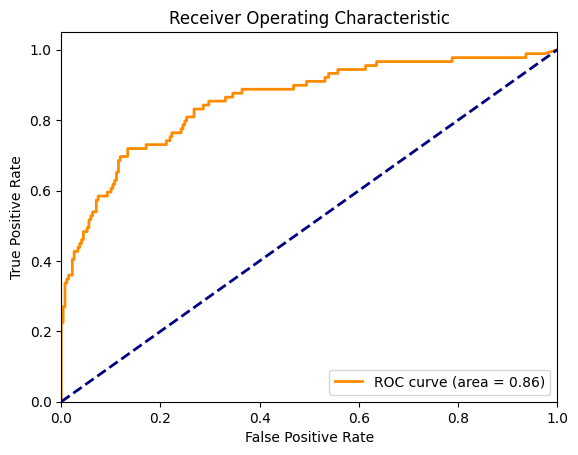

In [25]:
# calculate AUC and ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(merged_df['cancer'], merged_df['score'])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [29]:
all_annotations_df.to_csv('all_annotations_inbreast.csv', index=False)

In [30]:
detections.to_csv('detections_inbreast.csv', index=False)
